<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/hwk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [8]:
auto = pd.read_csv('/content/sample_data/auto-mpg.data', sep='\s+', names=['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration' , 'model year', 'origin', 'car name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
auto.shape

(398, 9)

**1(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median and a 0 if mpg contains a value below its medi**an

In [10]:
mpg_med = auto.mpg.median()
auto['mpg01'] = np.where(auto.mpg > mpg_med, 1, 0)

In [11]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0


**1(b) Explore the data graphically in orderto investigate the association between mpg01 and the other features using scatterplots and boxplots. Describe your findings.**

In [12]:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,mpg01
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.837419
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.736711
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.736608
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.745046
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.316618
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.448150
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.512200
mpg01,0.837419,-0.736711,-0.736608,-0.745046,0.316618,0.448150,0.512200,1.000000


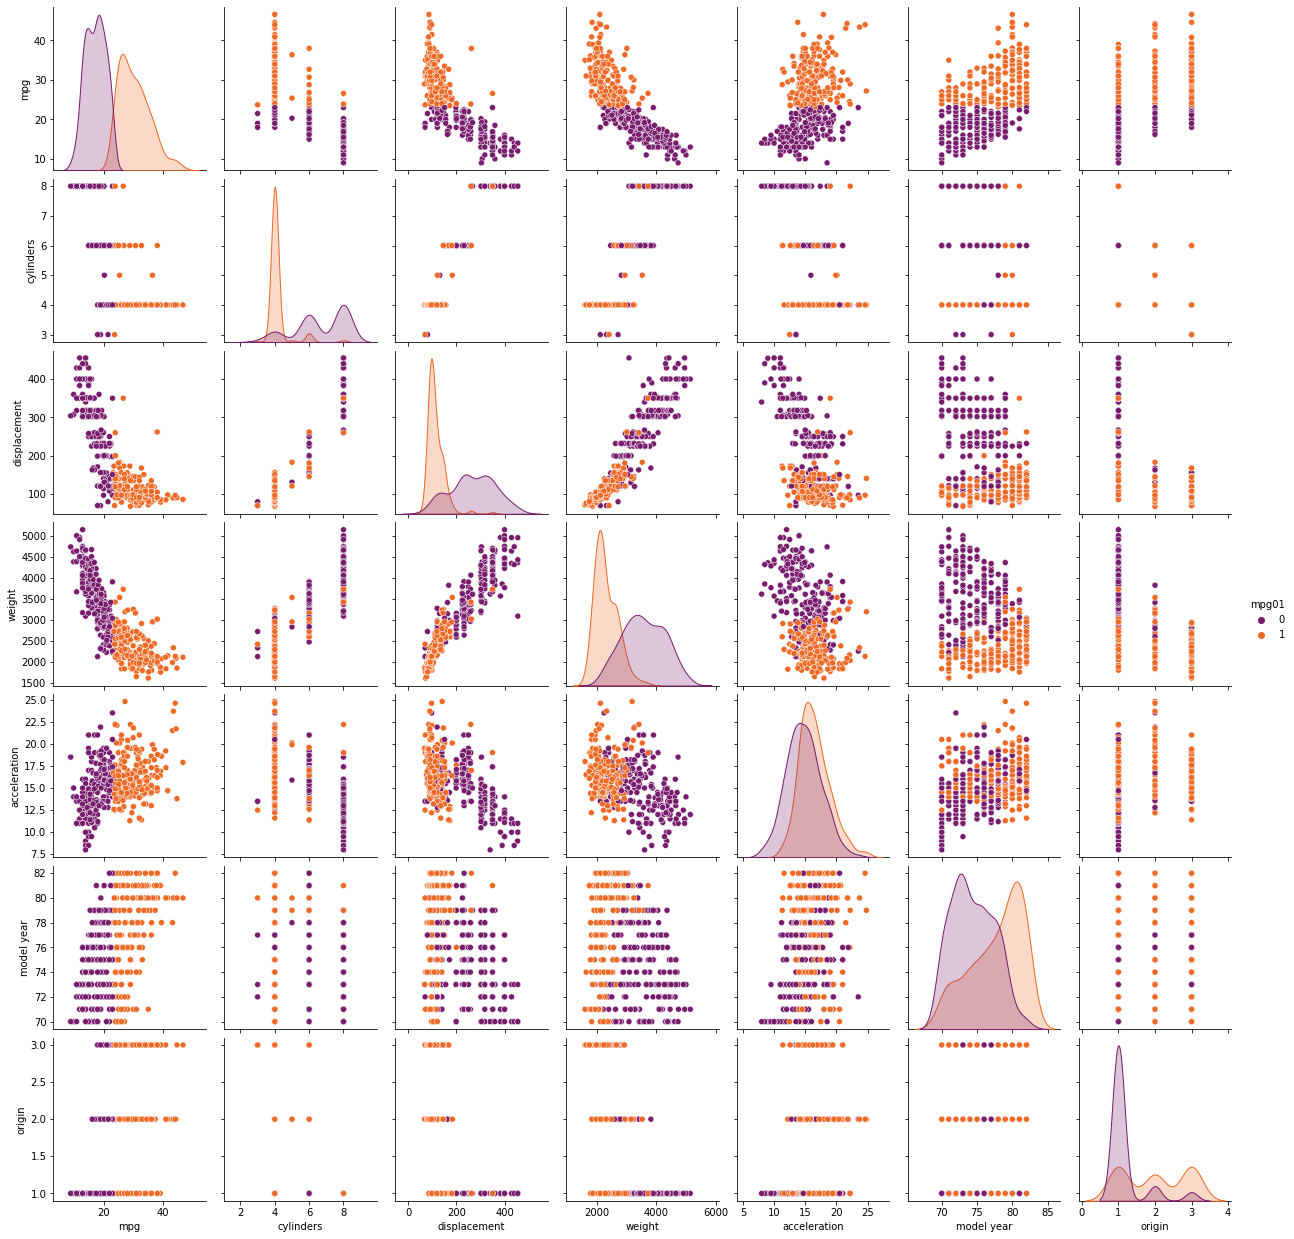

In [13]:
sns.pairplot(auto, hue='mpg01', palette='inferno')

In [15]:
auto['horsepower'] = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype('int64')

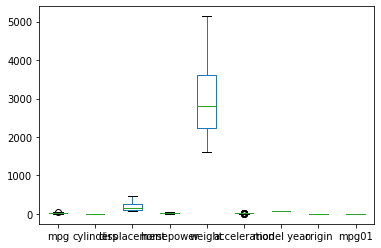

In [16]:
auto.plot(kind='box')

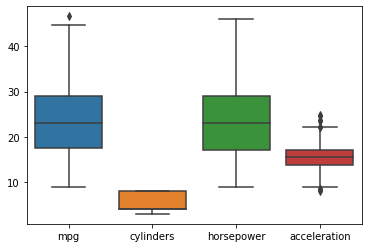

In [17]:
sns.boxplot(data=auto[['mpg', 'cylinders','horsepower', 'acceleration' ]], orient='v')

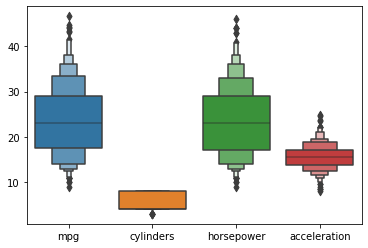

In [18]:
sns.boxenplot(data=auto[['mpg', 'cylinders','horsepower', 'acceleration' ]])


**Data Processing **

**1(c) Split the dat into a training set and test set**

In [19]:
X = auto.drop(['mpg01', 'car name', 'origin', 'model year', 'mpg', 'cylinders' ], axis=1)
y = auto['mpg01']

In [20]:
X.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 4)
(80, 4)
(318,)
(80,)


**Transform data using StandardScalar()**

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**1(d) Perform a logistic regression on the training data in order to predict mpg01 using variables that seemed most associated with mpg01. Calculate the test error.**

In [23]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [26]:
y_test

65     0
132    1
74     0
78     0
37     0
      ..
269    1
235    1
145    1
196    1
124    0
Name: mpg01, Length: 80, dtype: int64

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the logistic regression model is: ', accuracy)

The accuracy of the logistic regression model is:  0.95


In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05

In [29]:
error = np.sqrt(mse)

print('The error of the logistic regression model is:', error)

The error of the logistic regression model is: 0.22360679774997896


In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 1, 36]])

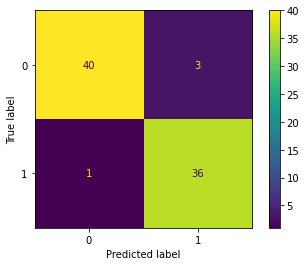

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(lr_fit, X_test, y_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.92      0.97      0.95        37

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



### Fit the LDA Model

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [34]:
lda = LDA()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

### Evaluate Model with stratified k-fold cross-validation

In [37]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9602822580645162


### Tune the model with GridSearchCV()

In [40]:
# define model
# model = LinearDiscriminantAnalysis()
# define model evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': np.arange(0, 1, 0.01), 'n_components': [0, 1, 2] }
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('The best parameters of the model: %s' % results.best_params_)

Mean Accuracy: 0.960
The best parameters of the model: {'n_components': 0, 'shrinkage': 0.0, 'solver': 'lsqr'}


### Get the best parameters of the LDA model

In [41]:
print('The best estimator of the model: ', results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', results.best_score_)



The best estimator of the model:  LinearDiscriminantAnalysis(n_components=0, priors=None, shrinkage=0.0,
                           solver='lsqr', store_covariance=False, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  1

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'n_components': 0, 'shrinkage': 0.0, 'solver': 'lsqr'}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9602822580645162


### Fit the QDA Model

In [42]:
qda = QDA()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

### Evaluate Model with stratified k-fold cross-validation

In [43]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))  

0.9518481182795698


### Tune the model with GridSearchCV()

In [44]:
grid = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# define search
qda_search = GridSearchCV(qda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
qda_results = qda_search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % qda_results.best_score_)
print('The best parameters of the model: %s' % qda_results.best_params_)

Mean Accuracy: 0.954
The best parameters of the model: {'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}


### Get the best parameters of the QDA model

In [45]:
print('The best estimator of the model: ', qda_results.best_estimator_)
print()
print('-'*100)
print('The best index of the model: ', qda_results.best_index_)
print()
print('-'*100)
print('The best parameter of the model: ', qda_results.best_params_)
print()
print('-'*100)
print('The best score of the model: ', qda_results.best_score_)



The best estimator of the model:  QuadraticDiscriminantAnalysis(priors=None, reg_param=0.01,
                              store_covariance=True, tol=0.0001)

----------------------------------------------------------------------------------------------------
The best index of the model:  24

----------------------------------------------------------------------------------------------------
The best parameter of the model:  {'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}

----------------------------------------------------------------------------------------------------
The best score of the model:  0.9539314516129032


### Summary of the LDA and QDA Models

In [46]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('LINEAR DISCRIMINANT ANALYSIS')
print('Accuracy Score - LDA:', metrics.accuracy_score(y_test, lda_pred))  
print('Average Precision - LDA:', metrics.average_precision_score(y_test, lda_pred)) 
print('F1 Score - LDA:', metrics.f1_score(y_test, lda_pred)) 
print('Precision - LDA:', metrics.precision_score(y_test, lda_pred)) 
print('Recall - LDA:', metrics.recall_score(y_test, lda_pred))
print('ROC Score - LDA:', roc_auc_score(y_test, lda_pred))

#Create classification report
class_report_RF=classification_report(y_test, lda_pred)
print(class_report_RF)
print('')
print('')
print('-'*100)
print('QUADRATIC DISCRIMINANT ANALYSIS')
print('Accuracy Score - QDA:', metrics.accuracy_score(y_test, qda_pred))  
print('Average Precision - QDA:', metrics.average_precision_score(y_test, qda_pred)) 
print('F1 Score - QDA:', metrics.f1_score(y_test, qda_pred)) 
print('Precision - QDA:', metrics.precision_score(y_test, qda_pred)) 
print('Recall - QDA:', metrics.recall_score(y_test, qda_pred))
print('ROC Score - QDA:', roc_auc_score(y_test, qda_pred))
class_report_RFq=classification_report(y_test, qda_pred)
print(class_report_RFq)

LINEAR DISCRIMINANT ANALYSIS
Accuracy Score - LDA: 0.9875
Average Precision - LDA: 0.9736842105263158
F1 Score - LDA: 0.9866666666666666
Precision - LDA: 0.9736842105263158
Recall - LDA: 1.0
ROC Score - LDA: 0.9883720930232558
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



----------------------------------------------------------------------------------------------------
QUADRATIC DISCRIMINANT ANALYSIS
Accuracy Score - QDA: 0.9625
Average Precision - QDA: 0.925
F1 Score - QDA: 0.961038961038961
Precision - QDA: 0.925
Recall - QDA: 1.0
ROC Score - QDA: 0.9651162790697674
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.93      1.

## Using the Concrete data set https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+ Strength data set you will use a regression model to predict the strength. 
## (a) Scale the ”condition” variables using a logarithmic scale.

In [61]:
df = pd.read_csv('/content/sample_data/concrete_data.csv')

df.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [62]:
df.shape


(1030, 9)

In [63]:

col_names = ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"]
df.columns = col_names

In [64]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [66]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


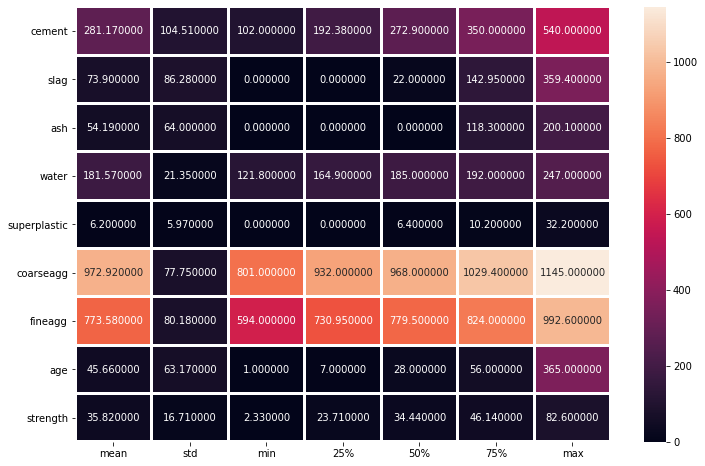

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(round(df.describe()[1:].transpose(), 2), annot=True, linewidth=2, fmt='f')


In [82]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


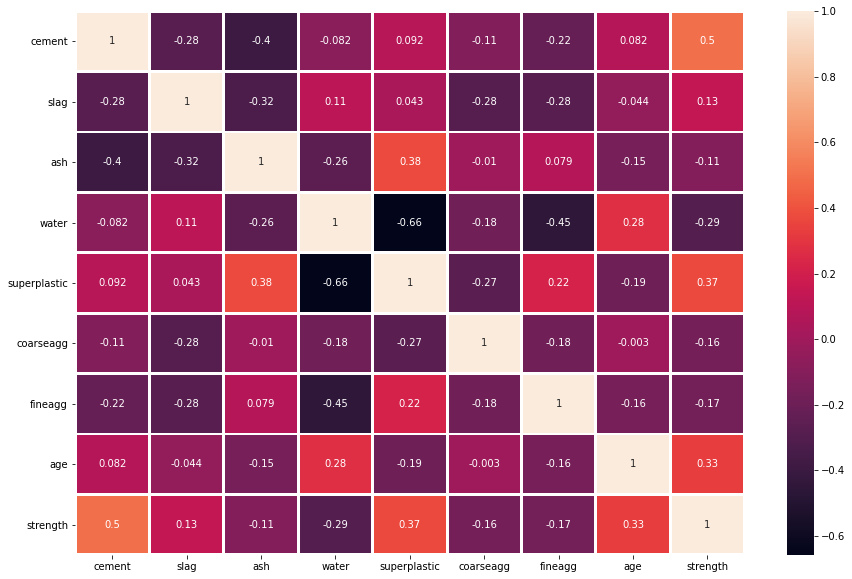

In [87]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=2, fmt=".2g")

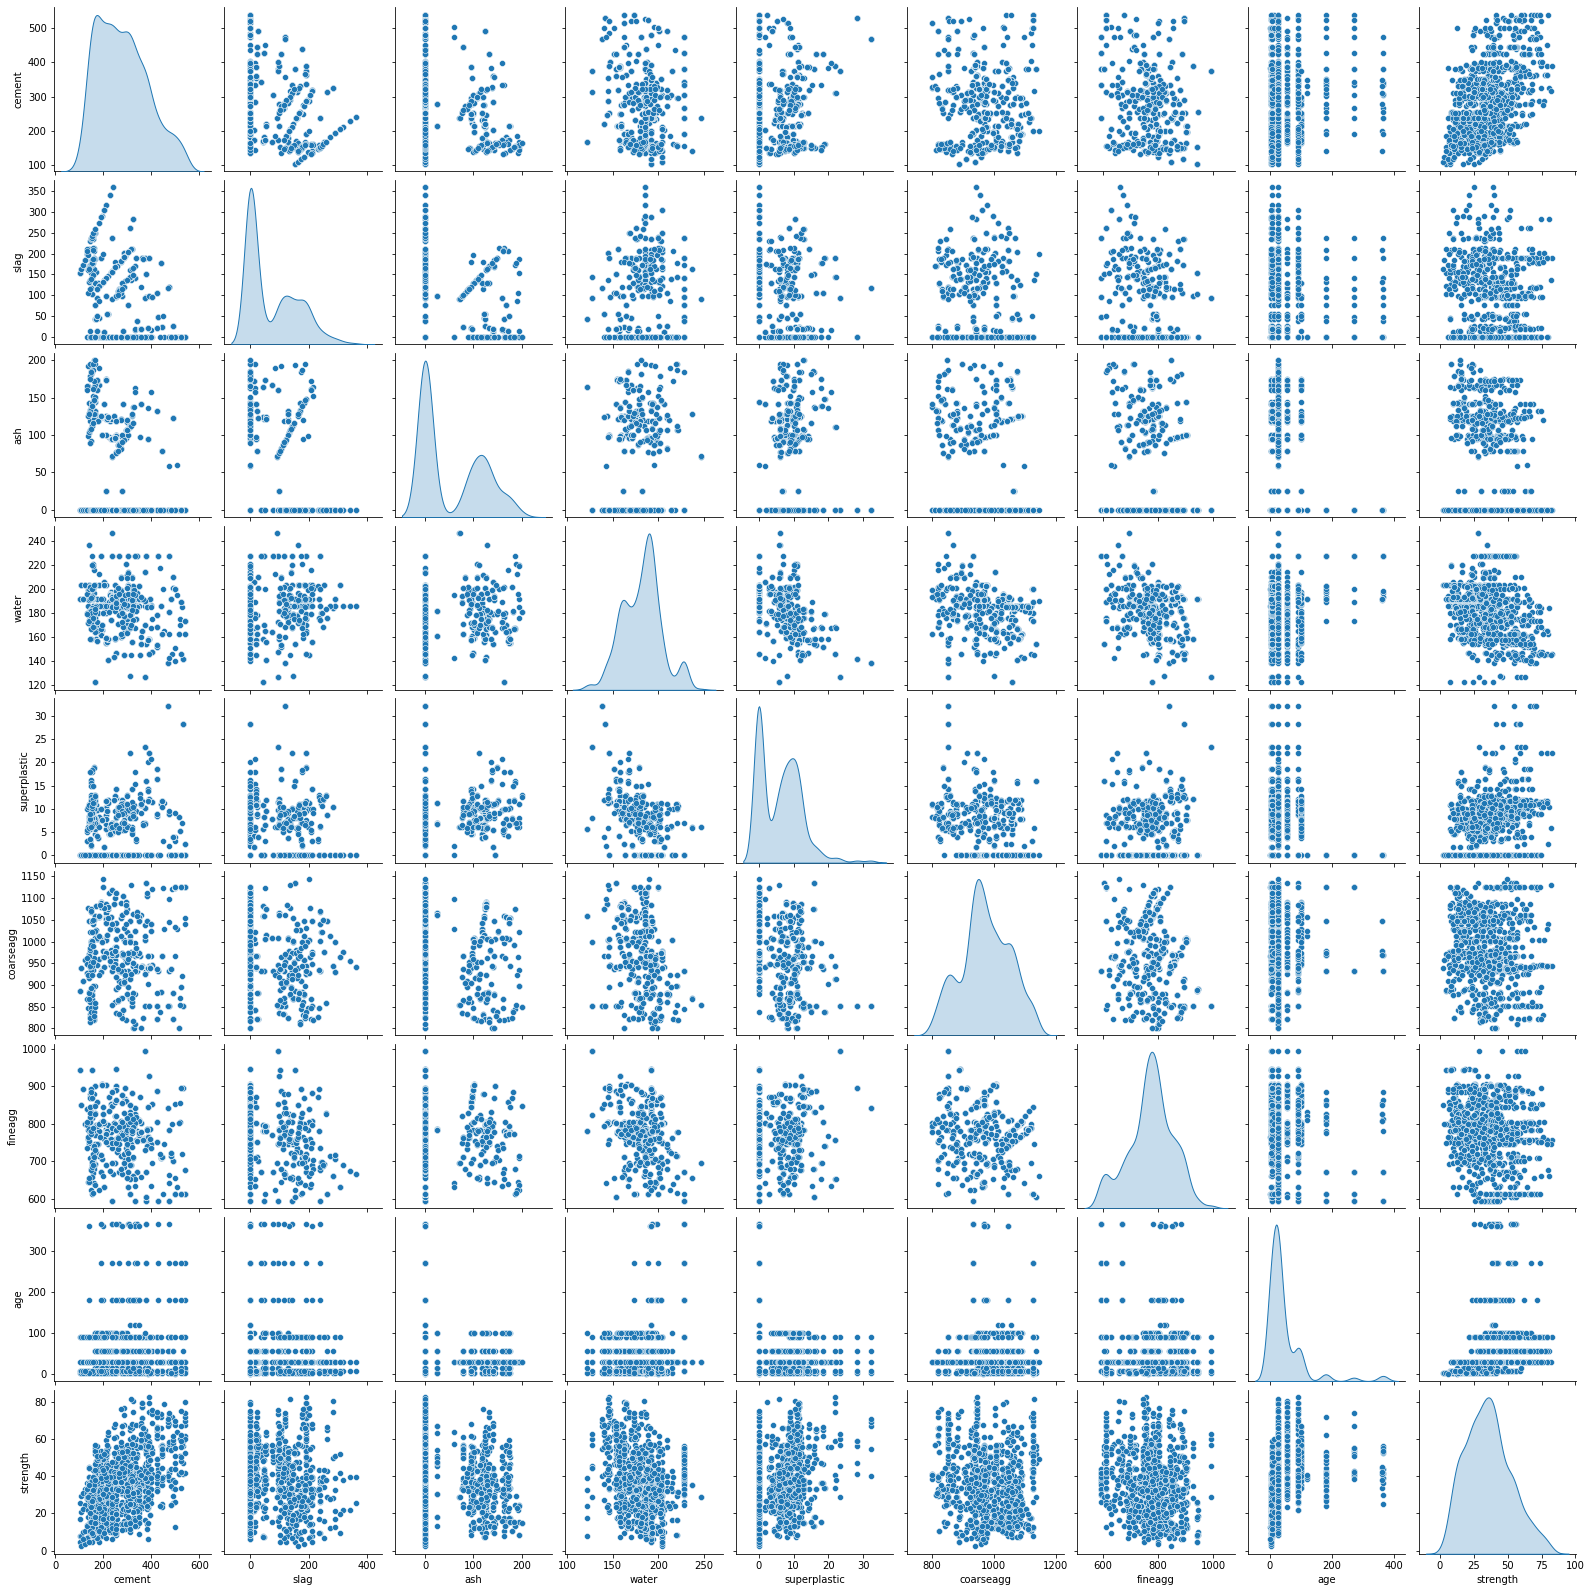

In [77]:
sns.pairplot(df, diag_kind='kde')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


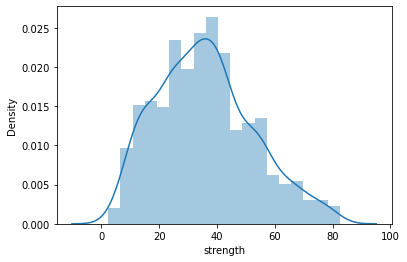

In [80]:
sns.distplot(df.strength)

In [81]:
print("Skewness =", df.strength.skew())

Skewness = 0.416977288410718


## (b) Use the snipped provided of the forward selection to reduce the number of covariates

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    The original version of this script is due to ajshumaher.
    I hacked it to get it closer to class materials. It is not perfect though

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    models = {}
    null_candidate = "1"
    # the number one refers to the intercept in the model
    # We don't need to calculate the regression since in this case our estimate is the average of the response variable
    # that is, \hat{Y}= (mean(Y),\ldots,mean(Y))
    # In this case the R^2 =0
    models[null_candidate] = 0.0
    tmp_remaining = remaining
    key_variables = [null_candidate]
    for i in range(0, len(remaining)):
        candidate_and_scores = {}
        key_formula = []
        for candidate in tmp_remaining:
            key_formula = "+".join(key_variables + [candidate])
            formula = "{} ~ {} ".format(response, key_formula)
            score = smf.ols(formula, data).fit().rsquared
            candidate_and_scores[candidate] = score
        max_candidate = max(candidate_and_scores, key=candidate_and_scores.get)
        key_variables.append(max_candidate)
        models[",".join(str(x) for x in key_variables)] = candidate_and_scores[max_candidate]
        tmp_remaining.remove(max_candidate)
    models.pop("1")  # I'll remove the first one since R^2 (adjusted or not will be zero)
    models_adj = {}
    for variables, scores in models.items():
        my_formula = variables.replace(",", "+")
        formula = "{} ~ {} ".format(response, my_formula)
        score = smf.ols(formula, data).fit().rsquared_adj
        models_adj[variables] = score
    # max_candidate = max(models_adj, key=models_adj.get)

    return models_adj

In [60]:
forward_selected(df, 'strength')

{'1,age': 0.37411138858449877,
 '1,age,comp_1': 0.6803193230604443,
 '1,age,comp_1,comp_5': 0.6987591540962265,
 '1,age,comp_1,comp_5,comp_2': 0.7083841565208615,
 '1,age,comp_1,comp_5,comp_2,comp_4': 0.7336992382291012,
 '1,age,comp_1,comp_5,comp_2,comp_4,comp_7': 0.737836680095603,
 '1,age,comp_1,comp_5,comp_2,comp_4,comp_7,comp_3': 0.7475996321712093,
 '1,age,comp_1,comp_5,comp_2,comp_4,comp_7,comp_3,comp_6': 0.7527661715249907}

## (c) Produce a python program that calculates the best subset selection.

## (d) Compare the best subset selection with the one obtained by the forward selection.